In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **SUBQUESTION 2:** 
### What are the most predictive factors of stock price performance for american food companies?

### We build three different models to predict yearly average stock direction of the basket of stocks based on the features we have observed

#### Creating the label column:

In [62]:
all_stocks = pd.read_csv('Datathon Data/Datathon Data/all_stock_and_etfs.csv')
all_stocks['Date-Time'] = pd.to_datetime(all_stocks['Date-Time'])

In [84]:
stock_list = ['CAG', 'HRL', 'DPZ', 'CMG', 'DRI', 'MCD', 'PPC', 'YUM', 'HSY', 'TSN', 'WEN', 'SPY']  #Removed QSR since it starts trading in 2014
selected_stocks = all_stocks[all_stocks['Ticker_Symbol'].isin(stock_list)][['Date-Time', 'Ticker_Symbol', 'Close']]
selected_stocks = selected_stocks.pivot(index='Date-Time', columns='Ticker_Symbol', values='Close').dropna()

selected_stocks_yearly = selected_stocks.groupby(selected_stocks.index.year).last()
average_yearly_pct = (selected_stocks_yearly.drop('SPY', axis=1).pct_change().dropna().mean(axis=1) - selected_stocks_yearly['SPY'].pct_change().dropna()).to_frame(name='Average Yearly Return over S&P500')
average_yearly_pct['Direction'] = np.where(average_yearly_pct['Average Yearly Return over S&P500'] >= 0, 1, 0)

In [85]:
average_yearly_pct

,Average Yearly Return over S&P500,Direction
Date-Time,,
2007,-0.050976,0
2008,0.035107,1
2009,1.192494,1
2010,0.243138,1
2011,0.222929,1
2012,-0.081792,0
2013,0.211834,1
2014,0.086635,1
2015,0.096026,1


In [86]:
selected_stocks_yearly.pct_change()

Ticker_Symbol,CAG,CMG,DPZ,DRI,HRL,HSY,MCD,PPC,SPY,TSN,WEN,YUM
Date-Time,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.118889,1.580175,-0.527500,-0.310182,0.084092,-0.208835,0.328897,-0.016310,0.032411,-0.068085,-0.598436,-0.349150
2008,-0.306431,-0.578568,-0.643991,0.016961,-0.232213,-0.118274,0.055678,-0.978238,-0.382806,-0.428571,-0.434135,-0.176901
2009,0.396970,0.422394,0.779193,0.244500,0.237130,0.030225,0.004020,13.126984,0.234929,0.400685,-0.050607,0.110159
2010,-0.020390,1.412205,0.903341,0.324209,0.333160,0.317407,0.229340,-0.203371,0.128410,0.403423,-0.014925,0.402631
2011,0.169176,0.588169,1.128527,-0.018519,-0.428599,0.310286,0.307061,-0.187588,-0.001988,0.198606,0.160173,0.203058
2012,0.117424,-0.119263,0.282769,-0.011189,0.065551,0.168987,-0.120801,0.256944,0.134741,-0.060078,-0.123134,0.125233
2013,0.142373,0.791098,0.599311,0.206346,0.447293,0.346303,0.099989,1.244475,0.296889,0.724742,0.855319,0.138705
2014,0.076558,0.284789,0.352046,0.078352,0.153420,0.068909,-0.034319,1.017846,0.112892,0.198147,0.035550,-0.036503


In [87]:
selected_stocks_yearly

Ticker_Symbol,CAG,CMG,DPZ,DRI,HRL,HSY,MCD,PPC,SPY,TSN,WEN,YUM
Date-Time,,,,,,,,,,,,
2006,27.00,57.00,28.00,40.17,37.34,49.80,44.33,29.43,141.62,16.45,21.74,58.80
2007,23.79,147.07,13.23,27.71,40.48,39.40,58.91,28.95,146.21,15.33,8.73,38.27
2008,16.50,61.98,4.71,28.18,31.08,34.74,62.19,0.63,90.24,8.76,4.94,31.50
2009,23.05,88.16,8.38,35.07,38.45,35.79,62.44,8.90,111.44,12.27,4.69,34.97
2010,22.58,212.66,15.95,46.44,51.26,47.15,76.76,7.09,125.75,17.22,4.62,49.05
2011,26.40,337.74,33.95,45.58,29.29,61.78,100.33,5.76,125.50,20.64,5.36,59.01
2012,29.50,297.46,43.55,45.07,31.21,72.22,88.21,7.24,142.41,19.40,4.70,66.40
2013,33.70,532.78,69.65,54.37,45.17,97.23,97.03,16.25,184.69,33.46,8.72,75.61
2014,36.28,684.51,94.17,58.63,52.10,103.93,93.70,32.79,205.54,40.09,9.03,72.85


In [88]:
average_yearly_pct.to_excel('average_yearly_pct.xlsx')

PermissionError: [Errno 13] Permission denied: 'average_yearly_pct.xlsx'

#### Creating commodities features:

In [128]:
all_commodities_in = pd.read_csv('Datathon Data/Datathon Data/all_commodities.csv')
all_commodities_in['Date-Time'] = pd.to_datetime(all_commodities_in['Date-Time'])
all_commodities_in['Commodity'].fillna(value = 'Corn', inplace = True)
all_commodities_in = all_commodities_in[['Date-Time', 'Value', 'Commodity']]
all_commodities_in = all_commodities_in.pivot(index='Date-Time', columns='Commodity', values='Value')
all_commodities = all_commodities_in.groupby(all_commodities_in.index.year).mean()

# include also yearly increase
for commodity in all_commodities.columns:
    all_commodities[commodity + ' Log Return'] = np.log(1+all_commodities_in.groupby(all_commodities_in.index.year).last().pct_change()[commodity])

C:\Users\Asus\AppData\Local\Temp\ipykernel_24292\1686469128.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_commodities_in['Commodity'].fillna(value = 'Corn', inplace = True)


In [130]:
all_commodities

Commodity,Coffee,Corn,Sugar,Coffee Log Return,Corn Log Return,Sugar Log Return
Date-Time,,,,,,
1990,89.147504,109.279606,12.510834,NaN,NaN,NaN
1991,85.027028,107.472829,8.976223,-0.179811,0.041745,-0.078805
1992,61.737390,104.212808,9.069763,0.000565,-0.126458,-0.099585
1993,71.118638,102.039965,10.020614,0.094094,0.253929,0.255676
1994,147.348975,107.778190,12.109524,0.675795,-0.167284,0.332603
1995,150.833404,123.451316,13.278215,-0.422325,0.368084,-0.175717
1996,121.972004,164.522941,11.955208,0.094359,-0.237722,-0.136623
1997,188.928111,117.172417,11.402344,0.413639,-0.028041,0.137976
1998,135.469270,101.617841,8.918203,-0.412250,-0.175432,-0.422767


#### Red Meat and Poultry production

In [131]:
meat_production = pd.read_csv('Datathon Data/Datathon Data/Meat_Stats_Meat_Production.csv', thousands=',')
meat_production = meat_production.groupby(['Year', 'Animal', 'Commercial or Federally Inspected']).sum()['Production'].to_frame(name='Production')
meat_production = meat_production.pivot_table(index=['Year'], columns=['Commercial or Federally Inspected', 'Animal'], values='Production')
meat_production.columns = [f'{level[0]}_{level[1]}' for level in meat_production.columns]

In [132]:
meat_production[meat_production.index >= 2006]

,Commercial_Beef,Commercial_Lamb and Mutton,Commercial_Pork,Commercial_Veal,Federally Inspected_Beef,Federally Inspected_Broilers,Federally Inspected_Lamb and Mutton,Federally Inspected_Other Chicken,Federally Inspected_Pork,Federally Inspected_Turkey,Federally Inspected_Veal
Year,,,,,,,,,,,
2006,26152.0,185.3,21053.9,146.6,25791.6,35499.6,177.2,504.6,20877.2,5690.2,143.7
2007,26420.5,183.0,21942.5,137.3,26069.9,36159.0,174.7,498.2,21768.1,5918.9,134.2
2008,26561.2,173.8,23346.9,143.1,26199.8,36906.3,165.6,559.3,23169.8,6215.7,140.1
2009,25965.4,170.7,22999.0,138.4,25597.9,35510.4,161.7,500.1,22826.8,5699.2,135.2
2010,26304.3,163.6,22436.5,134.2,25954.2,36909.8,154.2,503.9,22274.6,5639.2,130.7
2011,26195.3,148.7,22758.2,129.5,25854.3,37202.5,140.8,521.5,22599.1,5792.9,126.2
2012,25912.6,156.3,23252.5,118.0,25572.6,37039.4,147.7,516.5,23090.0,5984.6,115.0
2013,25719.9,155.9,23187.2,111.3,25384.8,37830.1,145.6,523.3,23039.8,5824.0,109.0
2014,24250.2,155.9,22843.2,94.1,23932.2,38565.3,145.1,521.2,22709.7,5703.8,92.2


#### Nutrition Physical Activity and Obesity Data

In [167]:
nutrition_activiy_obesity = pd.read_csv('Datathon Data/Datathon Data/Nutrition_Physical_Activity_and_Obesity_Data.csv')
questions = ['Q037', 'Q036', 'Q047', 'Q039', 'Q038'] #Removed Q058
nutrition_activiy_obesity = nutrition_activiy_obesity[(nutrition_activiy_obesity['LocationDesc'] == 'National')&(nutrition_activiy_obesity['StratificationID1'] == 'OVERALL')&(nutrition_activiy_obesity['QuestionID'].isin(questions))]
nutrition_activiy_obesity = nutrition_activiy_obesity[['YearStart', 'Question', 'QuestionID', 'Data_Value', 'Datasource']]

n_a_o_features = nutrition_activiy_obesity.pivot_table(index='YearStart', columns='Question', values='Data_Value')
new_rows = pd.DataFrame({
    'YearStart': [2002, 2004, 2006, 2008, 2010],
}).set_index('YearStart')
n_a_o_features = pd.concat([n_a_o_features, new_rows]).sort_index()

# manually adding in the missing features, they derive from the same source as the dataset:

added_values ={2010: (34.6, 26.6, 24.4), 2009: (34.6, 26.2, 24.7), 2008:(34.7, 25.5, 25.5), 2007: (34.9, 25.1, 24.16)}

for i in range(2007, 2011):
    n_a_o_features['Percent of adults aged 18 years and older who have an overweight classification'].loc[i] = added_values[i][0]
    n_a_o_features['Percent of adults aged 18 years and older who have obesity'].loc[i] = added_values[i][1]
    n_a_o_features['Percent of adults who engage in no leisure-time physical activity'].loc[i] = added_values[i][2]

n_a_o_features['Percent of students in grades 9-12 who have obesity'].loc[2021] = 16.3
n_a_o_features['Percent of students in grades 9-12 who have an overweight classification'].loc[2021] = 16.0

n_a_o_features = n_a_o_features.interpolate().dropna()

C:\Users\Asus\AppData\Local\Temp\ipykernel_24292\147235307.py:1: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  nutrition_activiy_obesity = pd.read_csv('Datathon Data/Datathon Data/Nutrition_Physical_Activity_and_Obesity_Data.csv')
C:\Users\Asus\AppData\Local\Temp\ipykernel_24292\147235307.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps upd

In [168]:
n_a_o_features

,Percent of adults aged 18 years and older who have an overweight classification,Percent of adults aged 18 years and older who have obesity,Percent of adults who engage in no leisure-time physical activity,Percent of students in grades 9-12 who have an overweight classification,Percent of students in grades 9-12 who have obesity
YearStart,,,,,
2007,34.9,25.1,24.16,15.60,12.80
2008,34.7,25.5,25.50,15.60,12.30
2009,34.6,26.2,24.70,15.60,11.80
2010,34.6,26.6,24.40,15.40,12.40
2011,35.8,27.4,25.40,15.20,13.00
2012,35.7,27.7,23.30,15.90,13.35
2013,35.5,28.3,26.30,16.60,13.70
2014,35.2,28.9,23.70,16.30,13.80
2015,35.7,28.9,25.90,16.00,13.90


#### Acs 5 yr

In [16]:
acs_5yr = pd.read_csv('Datathon Data/Datathon Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv')

In [17]:
acs_5yr['Category'].unique()

array(['Header', 'EMPLOYMENT STATUS', 'COMMUTING TO WORK', 'OCCUPATION',
       'INDUSTRY', 'CLASS OF WORKER',
       'INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)',
       'HEALTH INSURANCE COVERAGE',
       'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL',
       'INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)',
       'IN

In [22]:
sorted(acs_5yr['Year'].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

#### Combined Dataset:

In [135]:
final_df = all_commodities.join(meat_production, how='inner').join(n_a_o_features, how='inner')#.drop('Average Yearly Return', axis=1)

# Standardize the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_df_scaled = scaler.fit_transform(final_df)
final_df_scaled_pd = pd.DataFrame(final_df_scaled, columns=final_df.columns, index=final_df.index)

pd.DataFrame(final_df_scaled, columns=final_df.columns, index=final_df.index).join(average_yearly_pct['Direction'])

,Coffee,Corn,Sugar,Coffee Log Return,Corn Log Return,Sugar Log Return,Commercial_Beef,Commercial_Lamb and Mutton,Commercial_Pork,Commercial_Veal,...,Federally Inspected_Other Chicken,Federally Inspected_Pork,Federally Inspected_Turkey,Federally Inspected_Veal,Percent of adults aged 18 years and older who have an overweight classification,Percent of adults aged 18 years and older who have obesity,Percent of adults who engage in no leisure-time physical activity,Percent of students in grades 9-12 who have an overweight classification,Percent of students in grades 9-12 who have obesity,Direction
2007,-1.131365,-0.817268,-1.608931,0.152194,0.396006,-0.594107,0.154581,2.204236,-1.320490,1.277247,...,-1.583977,-1.325100,0.601538,1.279067,-0.299765,-1.583011,-0.516813,-0.742270,-0.912426,0
2008,-0.753622,0.260878,-1.002581,-0.658170,-0.870195,0.188595,0.276555,1.505263,-0.640532,1.463407,...,1.492709,-0.649953,1.991131,1.472567,-0.716829,-1.422706,0.756804,-0.742270,-1.267628,1
2009,-0.658772,-0.780847,0.381903,0.923176,-0.022123,3.054822,-0.239950,1.269739,-0.808972,1.312553,...,-1.488303,-0.815163,-0.427078,1.311863,-0.925361,-1.142172,-0.003564,-0.742270,-1.622830,1
2010,0.568283,-0.414042,1.047779,1.548839,2.000745,0.343893,0.053846,0.730313,-1.081313,1.177747,...,-1.296954,-1.081138,-0.707993,1.164279,-0.925361,-0.981867,-0.288702,-1.336085,-1.196588,1
2011,2.329496,1.496793,2.346374,-0.309054,-0.044470,-0.866274,-0.040647,-0.401720,-0.925558,1.026893,...,-0.410707,-0.924838,0.011617,1.016694,1.577024,-0.661258,0.661758,-1.929901,-0.770345,1
2012,0.342849,1.615586,1.165274,-1.699109,0.725393,-0.939520,-0.285722,0.175693,-0.686237,0.657781,...,-0.662482,-0.688390,0.909140,0.649372,1.368492,-0.541029,-1.334208,0.148454,-0.521703,0
2013,-0.758975,0.903597,0.274555,-0.818671,-2.552825,-0.739444,-0.452776,0.145303,-0.717853,0.442733,...,-0.320068,-0.712569,0.157225,0.452593,0.951428,-0.300572,1.517172,2.226809,-0.273062,1
2014,0.669340,-0.288045,0.133266,1.452568,-0.733810,-0.535391,-1.726872,0.145303,-0.884405,-0.109329,...,-0.425814,-0.871566,-0.405542,-0.098390,0.325831,-0.060114,-0.954024,1.336085,-0.202021,1
2015,-0.279847,-0.704768,-0.817211,-1.069487,-0.658482,-0.198992,-2.205752,-0.272562,-0.081615,-0.481651,...,-0.355317,-0.078942,-0.703311,-0.462432,1.368492,-0.060114,1.136988,0.445362,-0.130981,1
2016,-0.187484,-0.896463,0.380279,0.196349,-0.581447,0.848493,-0.885363,-0.287757,0.131320,-0.703118,...,0.943840,0.129908,0.811288,-0.701847,0.325831,0.220419,-0.478794,-0.148454,0.188701,0


In [136]:
corrs = final_df_scaled_pd.corr()
correlation_values = corrs.abs().unstack().sort_values(ascending=False)
highest_correlation_values = correlation_values[correlation_values != 1.0]
sorted_highest_correlation_values = highest_correlation_values.sort_values(ascending=False)

display(sorted_highest_correlation_values)


Federally Inspected_Pork  Commercial_Pork                                                                    0.999985
Commercial_Pork           Federally Inspected_Pork                                                           0.999985
Commercial_Veal           Federally Inspected_Veal                                                           0.999957
Federally Inspected_Veal  Commercial_Veal                                                                    0.999957
Federally Inspected_Beef  Commercial_Beef                                                                    0.999666
                                                                                                               ...   
Corn                      Percent of adults aged 18 years and older who have an overweight classification    0.009166
Coffee Log Return         Federally Inspected_Veal                                                           0.007305
Federally Inspected_Veal  Coffee Log Return             

### Moving on to the model construction part, since we have many more features than datapoints we should assume sparsity

#### Model 1: XGBoost

In [137]:
import xgboost as xgb

learning_rate_range = np.arange(0.01, 1, 0.05)
train_XG = []
max_xgb, max_score = None, 0 
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr, objective='binary:logistic')
    xgb_classifier.fit(final_df_scaled_pd, average_yearly_pct['Direction'].loc[:2022])
    train_XG.append(xgb_classifier.score(final_df_scaled_pd, average_yearly_pct['Direction'].loc[:2022]))
    if train_XG[-1] > max_score:
        max_xgb = xgb_classifier
        max_score = train_XG[-1]

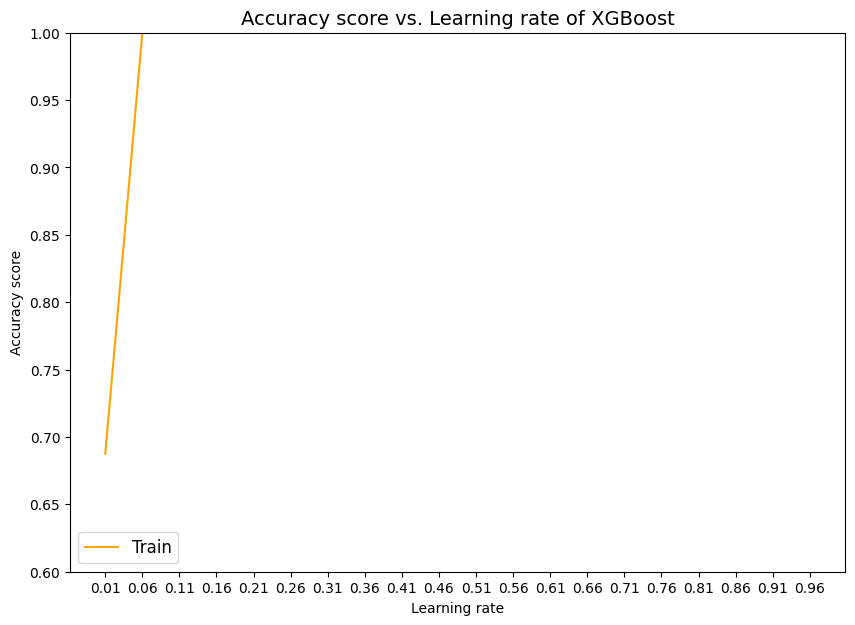

In [138]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

Feature: Coffee Log Return, Gain: 0.49
Feature: Corn Log Return, Gain: 0.43
Feature: Sugar Log Return, Gain: 0.71
Feature: Commercial_Lamb and Mutton, Gain: 0.65
Feature: Federally Inspected_Lamb and Mutton, Gain: 0.65
Feature: Federally Inspected_Other Chicken, Gain: 0.66
Feature: Federally Inspected_Turkey, Gain: 0.64
Feature: Percent of adults who engage in no leisure-time physical activity, Gain: 1.45


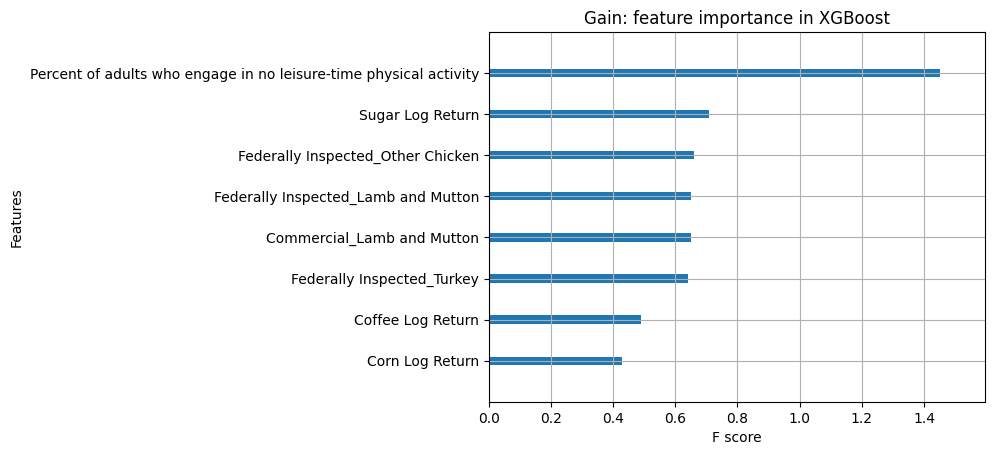

In [175]:
# Get the underlying booster object
booster = max_xgb.get_booster()

# Get the feature importance scores
feature_importance = booster.get_score(importance_type='gain')

for key in feature_importance.keys():
    feature_importance[key] = round(feature_importance[key],2)

# Print the feature importance scores
for feature, importance in feature_importance.items():
    print(f"Feature: {feature}, Gain: {importance}")

fig, ax = plt.subplots()
xgb.plot_importance(feature_importance, importance_type='gain', ax=ax, title='Gain: feature importance in XGBoost', show_values=False)
plt.show()

In [32]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'


Feature: Coffee Log Return, Gain: 8.0
Feature: Corn Log Return, Gain: 4.0
Feature: Sugar Log Return, Gain: 21.0
Feature: Commercial_Lamb and Mutton, Gain: 3.0
Feature: Federally Inspected_Lamb and Mutton, Gain: 1.0
Feature: Federally Inspected_Other Chicken, Gain: 1.0
Feature: Federally Inspected_Turkey, Gain: 25.0
Feature: Percent of adults who engage in no leisure-time physical activity, Gain: 43.0


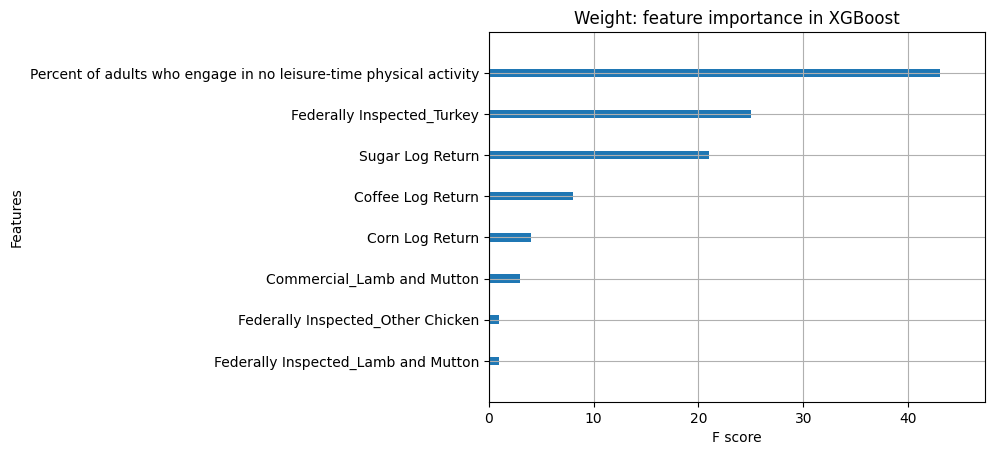

In [176]:
# Get the underlying booster object
booster = max_xgb.get_booster()

# Get the feature importance scores
feature_importance = booster.get_score(importance_type='weight')

# Print the feature importance scores
for feature, importance in feature_importance.items():
    print(f"Feature: {feature}, Gain: {importance}")

for key in feature_importance.keys():
    feature_importance[key] = round(feature_importance[key],2)
    
fig, ax = plt.subplots()
xgb.plot_importance(feature_importance, importance_type='gain', ax=ax, title='Weight: feature importance in XGBoost', show_values=False)
plt.show()

#### Model 2: SVM

In [180]:
from sklearn import svm

svc = svm.LinearSVC(loss='squared_hinge', penalty='l1', dual=False, C=1)
trained_svm_model = svc.fit(final_df_scaled_pd, average_yearly_pct['Direction'].loc[:2022])

In [181]:
feature_importance = [(name, coef) for name, coef in zip(final_df_scaled_pd.columns, trained_svm_model.coef_[0])]
sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

[('Percent of adults who engage in no leisure-time physical activity',
  0.8798258518065517),
 ('Federally Inspected_Turkey', -0.5948084155948985),
 ('Percent of students in grades 9-12 who have obesity', -0.4031854663898913),
 ('Federally Inspected_Other Chicken', 0.19344882070190822),
 ('Sugar Log Return', -0.16417811496369134),
 ('Commercial_Beef', -0.10962849886554535),
 ('Percent of students in grades 9-12 who have an overweight classification',
  0.08172075698112656),
 ('Coffee', 0.0),
 ('Corn', 0.0),
 ('Sugar', 0.0),
 ('Coffee Log Return', 0.0),
 ('Corn Log Return', 0.0),
 ('Commercial_Lamb and Mutton', 0.0),
 ('Commercial_Pork', 0.0),
 ('Commercial_Veal', 0.0),
 ('Federally Inspected_Beef', 0.0),
 ('Federally Inspected_Broilers', 0.0),
 ('Federally Inspected_Lamb and Mutton', 0.0),
 ('Federally Inspected_Pork', 0.0),
 ('Federally Inspected_Veal', 0.0),
 ('Percent of adults aged 18 years and older who have an overweight classification',
  0.0),
 ('Percent of adults aged 18 years

In [187]:
from collections import defaultdict
def default_value():
    return [0, 0]
features_appearing = defaultdict(default_value)
for c in np.arange(0.4, 1.1, 0.01):
    svc = svm.LinearSVC(loss='squared_hinge', penalty='l1', dual=False, C=c)
    mod = svc.fit(final_df_scaled_pd, average_yearly_pct['Direction'].loc[:2022])
    for name, coef in zip(final_df_scaled_pd.columns, mod.coef_[0]):
        if coef != 0:
            features_appearing[name][0] += 1
            features_appearing[name][1] = (features_appearing[name][1]*(features_appearing[name][0] - 1) + coef)/(features_appearing[name][0])


results_svc = sorted(features_appearing.items(), key=lambda x: (x[1][0], abs(np.mean(x[1][1]))), reverse=True)
resulting_features = pd.DataFrame(features_appearing).T.reset_index()
resulting_features.columns = ['features', 'frequency', 'average weight']
#results_svc = sorted(features_appearing.items(), key=lambda x: (x[1][0], abs(np.mean(x[1][1]))), reverse=True)
resulting_features = resulting_features.sort_values(by=['frequency', 'average weight'], ascending=[False, False], key=abs)
resulting_features['frequency'] = resulting_features['frequency']/70
resulting_features

,features,frequency,average weight
4,Percent of adults who engage in no leisure-tim...,1.000000,0.738449
3,Federally Inspected_Turkey,1.000000,-0.501261
5,Percent of students in grades 9-12 who have ob...,1.000000,-0.316298
2,Federally Inspected_Other Chicken,1.000000,0.129329
6,Sugar Log Return,0.928571,-0.110628
1,Corn Log Return,0.857143,-0.045274
7,Commercial_Beef,0.700000,-0.076521
8,Percent of students in grades 9-12 who have an...,0.314286,0.067572
0,Coffee,0.100000,0.013641


In [188]:
resulting_features.to_excel('resulting_features_SVM.xlsx')

In [183]:
results_svc

[('Percent of adults who engage in no leisure-time physical activity',
  [70, 0.7384776635666499]),
 ('Federally Inspected_Turkey', [70, -0.5012611063445926]),
 ('Percent of students in grades 9-12 who have obesity',
  [70, -0.31629397419244404]),
 ('Federally Inspected_Other Chicken', [70, 0.12932652145936618]),
 ('Sugar Log Return', [65, -0.11063009433500758]),
 ('Corn Log Return', [60, -0.04526093617937484]),
 ('Commercial_Beef', [49, -0.07652858852819862]),
 ('Percent of students in grades 9-12 who have an overweight classification',
  [22, 0.06761902689777222]),
 ('Coffee', [7, 0.013642575552836175])]

#### Model 3: Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.8, C=1, max_iter=10000)
trained_log_reg_model = log_reg.fit(final_df_scaled_pd, average_yearly_pct['Direction'].loc[:2022])

In [190]:
feature_importance = [(name, coef) for name, coef in zip(final_df_scaled_pd.columns, trained_log_reg_model.coef_[0])]
sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

[('Percent of adults who engage in no leisure-time physical activity',
  1.472408869593658),
 ('Federally Inspected_Turkey', -0.5203795180239293),
 ('Percent of students in grades 9-12 who have obesity', -0.13288050879437932),
 ('Corn Log Return', -0.061024893360700765),
 ('Coffee', 0.0445087294402445),
 ('Corn', 0.0),
 ('Sugar', 0.0),
 ('Coffee Log Return', 0.0),
 ('Sugar Log Return', 0.0),
 ('Commercial_Beef', 0.0),
 ('Commercial_Lamb and Mutton', 0.0),
 ('Commercial_Pork', 0.0),
 ('Commercial_Veal', 0.0),
 ('Federally Inspected_Beef', 0.0),
 ('Federally Inspected_Broilers', 0.0),
 ('Federally Inspected_Lamb and Mutton', 0.0),
 ('Federally Inspected_Other Chicken', 0.0),
 ('Federally Inspected_Pork', 0.0),
 ('Federally Inspected_Veal', 0.0),
 ('Percent of adults aged 18 years and older who have an overweight classification',
  0.0),
 ('Percent of adults aged 18 years and older who have obesity', 0.0),
 ('Percent of students in grades 9-12 who have an overweight classification',
  0.0

In [194]:
def default_value():
    return [0, 0]
features_appearing = defaultdict(default_value)
for c in np.arange(0.4, 1.1, 0.05):
    for l in np.arange(0.5, 1.0, 0.05):
        log_reg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=l, C=c, max_iter=10000)
        mod = log_reg.fit(final_df_scaled_pd, average_yearly_pct['Direction'].loc[:2022])
        for name, coef in zip(final_df_scaled_pd.columns, mod.coef_[0]):
            if coef != 0:
                features_appearing[name][0] += 1
                features_appearing[name][1] = (features_appearing[name][1]*(features_appearing[name][0] - 1) + coef)/(features_appearing[name][0])

sorted(features_appearing.items(), key=lambda x: (x[1][0], abs(np.mean(x[1][1]))), reverse=True)
results_log_reg = sorted(features_appearing.items(), key=lambda x: (x[1][0], abs(np.mean(x[1][1]))), reverse=True)
resulting_features = pd.DataFrame(features_appearing).T.reset_index()
resulting_features.columns = ['features', 'frequency', 'average weight']
resulting_features = resulting_features.sort_values(by=['frequency', 'average weight'], ascending=[False, False], key=abs)
resulting_features['frequency'] = resulting_features['frequency']/140
resulting_features

,features,frequency,average weight
2,Percent of adults who engage in no leisure-tim...,1.000000,1.155244
1,Federally Inspected_Turkey,0.935714,-0.347437
3,Percent of students in grades 9-12 who have ob...,0.600000,-0.124010
0,Corn Log Return,0.485714,-0.109405
4,Coffee,0.485714,0.064017
5,Commercial_Pork,0.164286,-0.008926
6,Sugar Log Return,0.035714,-0.015553
7,Federally Inspected_Veal,0.007143,0.003013


In [195]:
resulting_features.to_excel('resulting_features_Log_Reg.xlsx')

In [160]:
sorted(features_appearing.items(), key=lambda x: (x[1][0], abs(np.mean(x[1][1]))), reverse=True)

[('Percent of adults who engage in no leisure-time physical activity',
  [35, 1.1212159197938008]),
 ('Federally Inspected_Turkey', [33, -0.33301930582976513]),
 ('Percent of students in grades 9-12 who have obesity',
  [20, -0.13263393567937148]),
 ('Corn Log Return', [18, -0.10968314374442992]),
 ('Coffee', [18, 0.06302781950758307]),
 ('Commercial_Pork', [6, -0.006887055050233764]),
 ('Sugar Log Return', [1, -0.020652981064823692])]